# Sorting Algorithms

In [1]:
import random
import time
from typing import List, Callable, Generator

In [2]:
def quick_sort(arr):
    a = arr.copy()

    def _quick_sort(lo, hi):
        if lo < hi:
            p = partition(lo, hi)
            _quick_sort(lo, p - 1)
            _quick_sort(p + 1, hi)

    def partition(lo, hi):
        pivot = a[hi]
        i = lo
        for j in range(lo, hi):
            if a[j] <= pivot:
                a[i], a[j] = a[j], a[i]
                i += 1
        a[i], a[hi] = a[hi], a[i]
        return i

    _quick_sort(0, len(a) - 1)
    return a
def heap_sort(arr):
    a = arr.copy()
    n = len(a)

    def heapify(size, i):
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2

        if left < size and a[left] > a[largest]:
            largest = left
        if right < size and a[right] > a[largest]:
            largest = right
        if largest != i:
            a[i], a[largest] = a[largest], a[i]
            heapify(size, largest)

    # Build max heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(n, i)

    # Extract elements one by one
    for i in range(n - 1, 0, -1):
        a[i], a[0] = a[0], a[i]
        heapify(i, 0)

    return a
def bubble_sort(arr: List[int]) -> List[int]:
    a = arr.copy()
    n = len(a)
    for i in range(n):
        for j in range(0, n - i - 1):
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
    return a

def insertion_sort(arr: List[int]) -> List[int]:
    a = arr.copy()
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j + 1] = a[j]
            j -= 1
        a[j + 1] = key
    return a

def merge_sort(arr):
    if len(arr) <= 1:
        return arr.copy()

    # Split list in half
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])

    # Merge halves
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def sort_list(arr, algorithm="bubble"):
    if algorithm == "bubble":
        return bubble_sort(arr)

    elif algorithm == "insertion":
        return insertion_sort(arr)

    elif algorithm == "merge":
        return merge_sort(arr)

    elif algorithm == "quick":
        return quick_sort(arr)

    elif algorithm == "heap":
        return heap_sort(arr)


# Permutation generation

In [3]:
def generate_permutation(n):
    perm = list(range(1, n + 1))
    random.shuffle(perm)
    return perm


In [4]:
import random

def all_permutations_sjt(n):
    """
    Generate all permutations of [1..n] using Steinhaus–Johnson–Trotter (adjacent-swap) order.
    Returns a list of lists (each inner list is one permutation).
    source: https://en.wikipedia.org/wiki/Steinhaus%E2%80%93Johnson%E2%80%93Trotter_algorithm
    """
    # Start with [1,2,...,n], all “←” directions (we’ll encode ← as -1, → as +1)
    perm = list(range(1, n+1))
    dirs = [-1] * n
    result = [perm.copy()]

    while True:
        # 1) Find all “mobile” indices: i such that 0 <= i+dirs[i] < n and perm[i] > perm[i+dirs[i]]
        mobile = [i for i in range(n)
                  if 0 <= i + dirs[i] < n and perm[i] > perm[i + dirs[i]]]
        if not mobile:
            break

        # 2) Pick the mobile index whose element is largest
        i_max = max(mobile, key=lambda i: perm[i])
        d = dirs[i_max]

        # 3) Swap that element with its neighbor in direction d
        perm[i_max], perm[i_max + d] = perm[i_max + d], perm[i_max]
        dirs[i_max], dirs[i_max + d] = dirs[i_max + d], dirs[i_max]
        new_index = i_max + d  # the index of our “largest mobile” after swapping

        # 4) Reverse direction of all elements larger than perm[new_index]
        for j in range(n):
            if perm[j] > perm[new_index]:
                dirs[j] *= -1

        result.append(perm.copy())

    return result

all_perms = all_permutations_sjt(10) # Generate all permutations of [1..10] using Steinhaus–Johnson–Trotter order
print(len(all_perms)) # Should be 3628800 (10! = 10 factorial)

def random_permutation_from_sjt_pool(pool):
    return random.choice(pool)

# Example:
print(random_permutation_from_sjt_pool(all_perms))


3628800
[6, 10, 2, 4, 1, 3, 7, 5, 8, 9]


In [5]:
def test_algorithm(n=100):
    perm = generate_permutation(n)
    print(f"Original list: {perm}\n")

    algorithms = ["bubble", "insertion", "merge", "quick", "heap"]

    for alg in algorithms:
        start = time.perf_counter()
        result = sort_list(perm, alg)
        elapsed = time.perf_counter() - start
        print(f"{alg} sort")
        print(f"Time: {elapsed:.6f} seconds\n")
# Test our sorting algorithms
test_algorithm(1000)

Original list: [319, 57, 386, 789, 657, 40, 498, 755, 543, 441, 903, 839, 876, 670, 508, 344, 883, 609, 269, 492, 808, 340, 688, 518, 419, 484, 590, 959, 258, 221, 435, 7, 438, 14, 347, 691, 143, 369, 119, 9, 149, 467, 264, 16, 456, 389, 332, 63, 41, 424, 308, 603, 397, 240, 716, 265, 837, 231, 653, 880, 44, 860, 964, 440, 491, 546, 206, 194, 233, 366, 541, 592, 215, 843, 420, 776, 130, 533, 409, 542, 129, 23, 122, 636, 980, 697, 744, 583, 368, 763, 676, 62, 800, 963, 374, 668, 304, 470, 403, 833, 785, 116, 244, 176, 321, 567, 414, 552, 756, 3, 297, 935, 202, 447, 857, 731, 298, 659, 665, 802, 145, 863, 219, 866, 287, 723, 818, 647, 899, 709, 612, 836, 982, 821, 170, 333, 312, 671, 586, 212, 487, 220, 455, 74, 353, 681, 656, 715, 897, 596, 110, 526, 242, 513, 652, 108, 163, 806, 667, 816, 1000, 172, 631, 227, 662, 795, 238, 825, 415, 391, 870, 799, 613, 882, 557, 141, 960, 247, 485, 282, 916, 493, 540, 710, 701, 641, 862, 759, 223, 951, 931, 263, 90, 719, 82, 346, 499, 724, 479, 581, 9

# Memory Usage Comparison of Sorting Algorithms

Bubble sort peak memory: 9359 bytes
Insertion sort peak memory: 11326 bytes
Merge sort peak memory: 18606 bytes
Quick sort peak memory: 9856 bytes
Heap sort peak memory: 8564 bytes


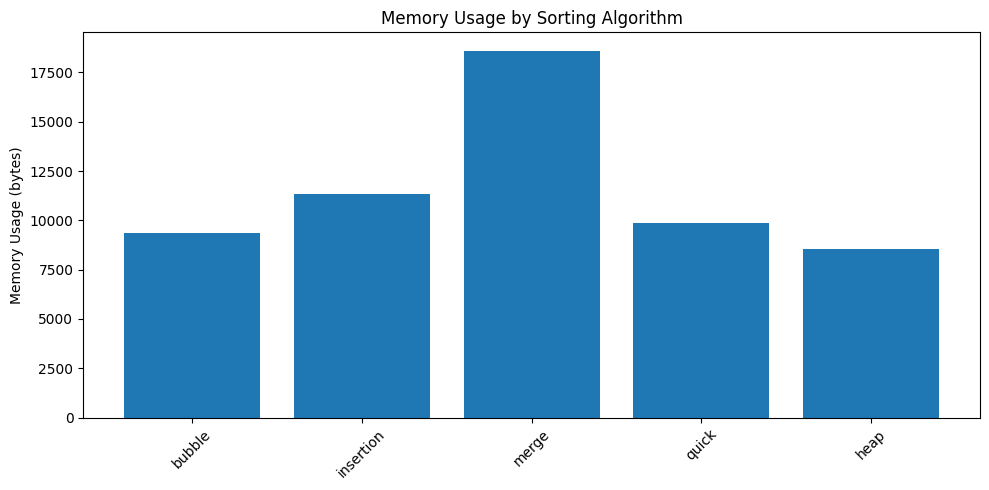

In [6]:
import tracemalloc
import random
from typing import Callable, Dict

def measure_peak_memory(func: Callable, input_data: list) -> float:
    """
    Runs func(input_data) and returns the peak memory (in bytes) that
    tracemalloc saw during its execution.
    """
    # Make sure to start with a clean slate
    tracemalloc.start()

    # Run the function (we'll track peak memory while it runs)
    func(input_data)

    # get_traced_memory() returns (current, peak)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak

def compare_memory_usage(n: int = 1000) -> Dict[str, float]:
    # Generate one random test array
    base = list(range(1, n + 1))
    random.shuffle(base)

    algorithms = {
        'bubble': bubble_sort,
        'insertion': insertion_sort,
        'merge': merge_sort,
        'quick': quick_sort,
        'heap': heap_sort
    }

    results = {}
    for name, func in algorithms.items():
        data_copy = base.copy()

        peak = measure_peak_memory(func, data_copy)
        results[name] = peak
        print(f"{name.capitalize()} sort peak memory: {peak} bytes")

    return results
results = compare_memory_usage()


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title('Memory Usage by Sorting Algorithm')
plt.ylabel('Memory Usage (bytes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Performance Comparison on Different Input Sizes and Structures


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def compare_algorithms(sizes):
    results = {}

    # Generate different test cases
    test_cases = {
        "random": lambda n: generate_permutation(n),
        "sorted": lambda n: list(range(1, n+1)),
        "reversed": lambda n: list(range(n, 0, -1))
    }

    for size in sizes:
        print(f"Testing with size = {size}")
        results[size] = {}

        for case_name, generator in test_cases.items():
            print(f"  Case: {case_name}")
            results[size][case_name] = {}

            # Generate test data
            data = generator(size)

            # Test each algorithm
            for alg in ["bubble", "insertion", "merge", "quick", "heap"]:
                start = time.perf_counter()
                sort_list(data, alg)
                elapsed = time.perf_counter() - start
                results[size][case_name][alg] = elapsed
                print(f"    {alg}: {elapsed:.6f} seconds")

    return results


Testing with size = 10
  Case: random
    bubble: 0.000026 seconds
    insertion: 0.000005 seconds
    merge: 0.000043 seconds
    quick: 0.000009 seconds
    heap: 0.000011 seconds
  Case: sorted
    bubble: 0.000007 seconds
    insertion: 0.000003 seconds
    merge: 0.000098 seconds
    quick: 0.000012 seconds
    heap: 0.000032 seconds
  Case: reversed
    bubble: 0.000012 seconds
    insertion: 0.000020 seconds
    merge: 0.000042 seconds
    quick: 0.000015 seconds
    heap: 0.000010 seconds
Testing with size = 20
  Case: random
    bubble: 0.000019 seconds
    insertion: 0.000010 seconds
    merge: 0.000043 seconds
    quick: 0.000017 seconds
    heap: 0.000047 seconds
  Case: sorted
    bubble: 0.000019 seconds
    insertion: 0.000007 seconds
    merge: 0.000040 seconds
    quick: 0.000070 seconds
    heap: 0.000059 seconds
  Case: reversed
    bubble: 0.000030 seconds
    insertion: 0.000019 seconds
    merge: 0.000028 seconds
    quick: 0.000029 seconds
    heap: 0.000025 seco

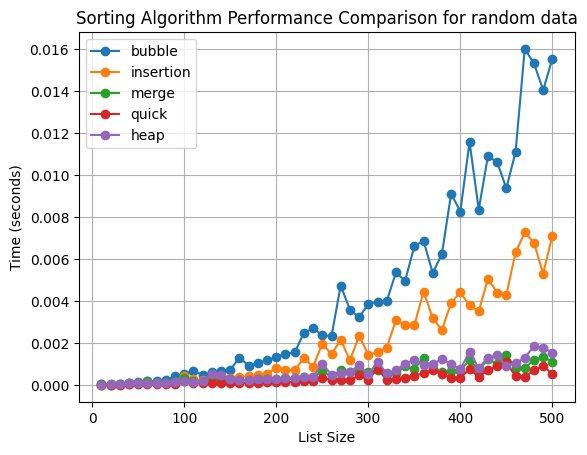

In [8]:

sizes = [i for i in range(10, 501, 10)]
results = compare_algorithms(sizes)

for alg in ["bubble", "insertion", "merge", "quick", "heap"]:
    times = [results[size]["random"][alg] for size in sizes]
    plt.plot(sizes, times, marker='o', label=alg)

plt.xlabel('List Size')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Performance Comparison for random data')
plt.legend()
plt.grid(True)
plt.show()


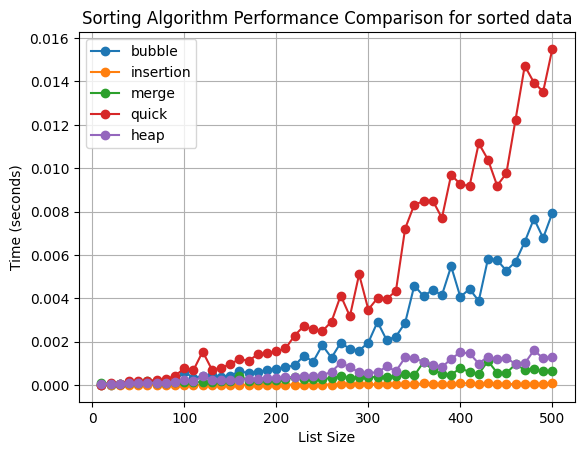

In [9]:
for alg in ["bubble", "insertion", "merge", "quick", "heap"]:
    times = [results[size]["sorted"][alg] for size in sizes]
    plt.plot(sizes, times, marker='o', label=alg)

plt.xlabel('List Size')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Performance Comparison for sorted data')
plt.legend()
plt.grid(True)
plt.show()


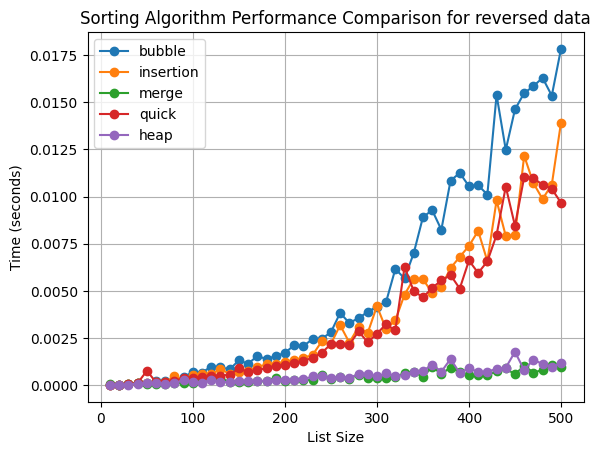

In [10]:
for alg in ["bubble", "insertion", "merge", "quick", "heap"]:
    times = [results[size]["reversed"][alg] for size in sizes]
    plt.plot(sizes, times, marker='o', label=alg)

plt.xlabel('List Size')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Performance Comparison for reversed data')
plt.legend()
plt.grid(True)
plt.show()


## Summary

- Bubble sort and insertion sort are simpler but slower (O(n²))
- Merge sort, quick sort, and heap sort are faster (O(n log n))
- Merge sort performs stable on all inputs but Merge Sort may require additional space
- Quick sort can have problems with already sorted lists
- Different algorithms perform better on different types of input
